In [1]:
import pandas as pd
import warnings

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("World military power.xlsx", header=1)

In [3]:
#EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    int64  
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    int64  
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    int64  
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    int64  
 10  Trainer Aircraft Fleet                   138 non-n

In [5]:
df.shape

(138, 60)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Military Strength                           0
Military Strength Power Index               0
Aircraft Strength                           0
Aircraft Strength value                     0
Fighter/Interceptor Strength                0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength                    0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength           0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet                      0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength                   0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength            0
Attack Helicopter Fleet Strength value      0
Tank Strength                               0
Tank Strength value                         0
AFV/APC Strength                            0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength           0
Self-Propelled Artillery Strength 

In [8]:
df.duplicated().value_counts()

False    138
Name: count, dtype: int64

In [9]:
# Feature Engineering 

In [10]:
df.rename(columns={'Military Strength': 'Country'}, inplace=True)

In [11]:
df.head()

,Country,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.0
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,64,Argentina,100,Argentina,0,Argentina,370,Argentina,739,Argentina,83,Argentina,172,Argentina,26,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.0


In [12]:
df.drop_duplicates(keep=False, inplace=True)

In [13]:
df.shape

(138, 60)

In [14]:
df.head(5)

,Country,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.0
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,64,Argentina,100,Argentina,0,Argentina,370,Argentina,739,Argentina,83,Argentina,172,Argentina,26,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.0


In [15]:
df.columns

Index(['Country', 'Military Strength Power Index', 'Aircraft Strength',
       'Aircraft Strength value', 'Fighter/Interceptor Strength',
       'Fighter/Interceptor Strength value', 'Attack Aircraft Strength',
       'Attack Aircraft Strength value', 'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',
       'Aircraft 

In [16]:
drop_columns =['Aircraft Strength', 'Fighter/Interceptor Strength', 'Attack Aircraft Strength',
               'Transport Aircraft Fleet Strength', 'Trainer Aircraft Fleet', 'Helicopter Fleet Strength',
               'Attack Helicopter Fleet Strength','Tank Strength', 'AFV/APC Strength',
               'Self-Propelled Artillery Strength', 'Towed Artillery Strength', 'Rocket Projector Strength', 
               'Navy Fleet Strengths', 'Aircraft Carrier Fleet Strength', 'Submarine Fleet Strength',
               'Destroyer Fleet Strength', 'Frigate Fleet Strength', 'defense spending budget',
               'External Debt', 'Airport Totals', 'Oil Production', 'Oil Consumption',
               'Proven Oil Reserves', 'Available Manpower', 'Total Population', 'Total Square Land Area',
               'Total Coastline Coverage', 'Total Waterway Coverage', 'Total Border Coverage',
               ]

In [17]:
# Delete dublicated country columns
df.drop(drop_columns, axis = 1, inplace = True)

# df = df.loc[:, ~df.apply(lambda x: x.dublicated(), axis=1).all()].copy()

In [18]:
df.head()

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987.0
1,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691.0
2,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734.0
3,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369.0
4,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000","2,14,90,00,00,000",1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968.0


In [19]:
df.shape

(138, 31)

In [20]:
df = df.reset_index()   # df = df.reset_index(drop = True)
del df['index']

In [21]:
#Country will be Index
df.set_index('Country', inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    int64  
 2   Fighter/Interceptor Strength value       138 non-null    int64  
 3   Attack Aircraft Strength value           138 non-null    int64  
 4   Transport Aircraft Fleet Strength value  138 non-null    int64  
 5   Trainer Aircraft Fleet value             138 non-null    int64  
 6   Helicopter Fleet Strength value          138 non-null    int64  
 7   Attack Helicopter Fleet Strength value   138 non-null    int64  
 8   Tank Strength value                      138 non-null    int64  
 9   AFV/APC Strength value                   138 non-null    int64  
 10  Self-Propelled Artillery Strength value 

In [23]:
# Columns separated incorrectly by commas are converted to int.
comma_columns = ['defense spending budget value', 'External Debt value', 'Proven Oil Reserves value', 
                 'Available Manpower value', 'Total Population value', 'Total Square Land Area value', 
                 'Oil Production value', 'Oil Consumption value', 'Total Coastline Coverage value',
                 'Total Waterway Coverage value']

In [24]:
for column in comma_columns:
    df[column] = df[column].astype(str).str.replace('[^\w\s]', '').str.replace(',', '')
    df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')

In [25]:
# Fill empty datas with the average 
df.fillna(df.mean(), inplace=True)

In [26]:
df.isnull().sum()

Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Production value                       0
Oil Consum

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    int64  
 2   Fighter/Interceptor Strength value       138 non-null    int64  
 3   Attack Aircraft Strength value           138 non-null    int64  
 4   Transport Aircraft Fleet Strength value  138 non-null    int64  
 5   Trainer Aircraft Fleet value             138 non-null    int64  
 6   Helicopter Fleet Strength value          138 non-null    int64  
 7   Attack Helicopter Fleet Strength value   138 non-null    int64  
 8   Tank Strength value                      138 non-null    int64  
 9   AFV/APC Strength value                   138 non-null    int64  
 10  Self-Propelled Artillery Strength value 

In [28]:
df.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,12000000000,2840000000,43,0,5500,0,14325743,34940837,652230,0.0,1200,5987.0
Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,250000000,9505000000,4,16000,42500,168300000,1519438,3057220,28748,362.0,41,691.0
Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,13000000000,6260000000,157,1306000,325000,12200000000,20741263,41657488,2381741,998.0,0,6734.0
Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,7000000000,42080000000,176,1666000,82300,8273000000,6244205,30355880,1246700,1600.0,1300,5369.0
Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,4200000000,214900000000,1138,479400,685000,2185000000,20179430,44694198,2780400,4989.0,11000,11968.0


In [29]:
drop_columns = ["Total Coastline Coverage value",
                "Total Waterway Coverage value",
                "Total Border Coverage value",
                "Total Square Land Area value"]

In [30]:
df.drop(drop_columns, axis = 1, inplace = True)

In [31]:
df.shape

(138, 26)

In [32]:
df.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value
Country,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,12000000000,2840000000,43,0,5500,0,14325743,34940837
Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,250000000,9505000000,4,16000,42500,168300000,1519438,3057220
Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,13000000000,6260000000,157,1306000,325000,12200000000,20741263,41657488
Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,7000000000,42080000000,176,1666000,82300,8273000000,6244205,30355880
Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,4200000000,214900000000,1138,479400,685000,2185000000,20179430,44694198


In [33]:
#sns.pairplot(df, palette="inferno", corner=True);


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x153d4f920> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x154111940> (for post_execute):



KeyboardInterrupt



In [ ]:
#for col in df.columns:
#    plt.figure(figsize = (40,15))
#    sns.barplot(y = df[col], x = df.index, data = df)
#    plt.xticks(rotation = 45);

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Military Strength Power Index,138.0,1.460716e+00,1.324018e+00,6.060000e-02,5.748000e-01,1.034100e+00,2.021525e+00,1.016810e+01
Aircraft Strength value,138.0,3.884710e+02,1.231982e+03,0.000000e+00,3.300000e+01,1.110000e+02,2.902500e+02,1.326400e+04
Fighter/Interceptor Strength value,138.0,8.156522e+01,2.303248e+02,0.000000e+00,0.000000e+00,1.700000e+01,6.050000e+01,2.085000e+03
Attack Aircraft Strength value,138.0,2.576087e+01,9.452822e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.575000e+01,7.420000e+02
Transport Aircraft Fleet Strength value,138.0,3.023188e+01,9.233044e+01,0.000000e+00,3.000000e+00,9.000000e+00,2.600000e+01,9.450000e+02
Trainer Aircraft Fleet value,138.0,8.283333e+01,2.408037e+02,0.000000e+00,4.250000e+00,2.600000e+01,7.925000e+01,2.643000e+03
Helicopter Fleet Strength value,138.0,1.540652e+02,5.201836e+02,0.000000e+00,1.525000e+01,4.400000e+01,1.267500e+02,5.768000e+03
Attack Helicopter Fleet Strength value,138.0,2.562319e+01,9.732609e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.775000e+01,9.670000e+02
Tank Strength value,138.0,6.465652e+02,1.515464e+03,0.000000e+00,1.925000e+01,1.530000e+02,4.362500e+02,1.295000e+04
AFV/APC Strength value,138.0,2.485696e+03,5.410546e+03,0.000000e+00,2.502500e+02,7.345000e+02,2.000000e+03,3.925300e+04


In [35]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [36]:
df.reset_index(inplace=True)

In [37]:
df.head()

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,12000000000,2840000000,43,0,5500,0,14325743,34940837
1,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,250000000,9505000000,4,16000,42500,168300000,1519438,3057220
2,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,13000000000,6260000000,157,1306000,325000,12200000000,20741263,41657488
3,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,7000000000,42080000000,176,1666000,82300,8273000000,6244205,30355880
4,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,4200000000,214900000000,1138,479400,685000,2185000000,20179430,44694198


In [38]:
x = df.drop(["Country"], axis = 1)

In [39]:
x.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value
0,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,12000000000,2840000000,43,0,5500,0,14325743,34940837
1,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,250000000,9505000000,4,16000,42500,168300000,1519438,3057220
2,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,13000000000,6260000000,157,1306000,325000,12200000000,20741263,41657488
3,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,7000000000,42080000000,176,1666000,82300,8273000000,6244205,30355880
4,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,4200000000,214900000000,1138,479400,685000,2185000000,20179430,44694198


In [40]:
allScore=[]
allClusters=[]
distances=[]

def clustering(value):
    for i in range(1,value+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        guess=model.predict(x)
        score=silhouette_score(x,guess)
        distance=model.inertia_
        print("Cluster ",i," Score ",score)
        allScore.append(score)
        allClusters.append(i)
        distances.append(distance)
clustering(10)

Cluster  2  Score  0.9227153206161361
Cluster  3  Score  0.8995442950406763
Cluster  4  Score  0.8671436271577667
Cluster  5  Score  0.8675195540884064
Cluster  6  Score  0.7789462746208773
Cluster  7  Score  0.7817947547149927
Cluster  8  Score  0.7847423624689158
Cluster  9  Score  0.6833747951570068
Cluster  10  Score  0.6795886786472797
Cluster  11  Score  0.6793362281615895


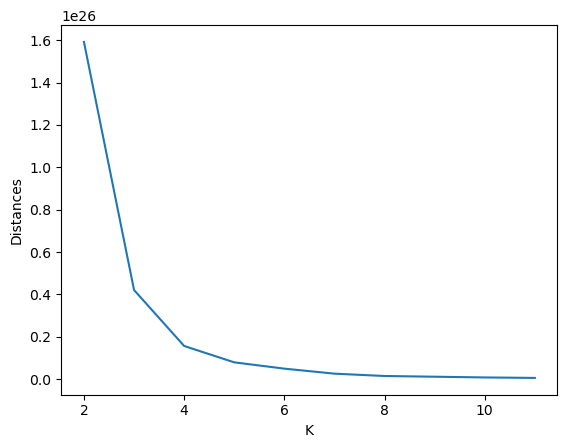

In [41]:
plt.xlabel("K")
plt.ylabel("Distances")
plt.plot(allClusters,distances)

In [42]:
model=KMeans(4)

In [43]:
model=model.fit(x)

In [44]:
guess=model.predict(x)

In [45]:
x["Cluster"]=guess

In [46]:
silhouette_score(x, guess)

0.8671436271577667

In [48]:
abs(x.corr()['Military Strength Power Index']).sort_values(ascending=False)

Military Strength Power Index              1.000000
Navy Fleet Strengths value                 0.365219
AFV/APC Strength value                     0.361796
Towed Artillery Strength value             0.335405
Frigate Fleet Strength value               0.328918
Tank Strength value                        0.324300
Fighter/Interceptor Strength value         0.310888
Trainer Aircraft Fleet value               0.284756
Oil Consumption value                      0.282414
Self-Propelled Artillery Strength value    0.268935
Aircraft Strength value                    0.267329
Transport Aircraft Fleet Strength value    0.267104
Oil Production value                       0.263961
Submarine Fleet Strength value             0.251830
Rocket Projector Strength value            0.247800
Helicopter Fleet Strength value            0.244545
Total Population value                     0.242678
Attack Aircraft Strength value             0.241948
Available Manpower value                   0.236737
External Deb

In [49]:
x.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Cluster
0,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,12000000000,2840000000,43,0,5500,0,14325743,34940837,3
1,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,250000000,9505000000,4,16000,42500,168300000,1519438,3057220,3
2,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,13000000000,6260000000,157,1306000,325000,12200000000,20741263,41657488,3
3,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,7000000000,42080000000,176,1666000,82300,8273000000,6244205,30355880,3
4,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,4200000000,214900000000,1138,479400,685000,2185000000,20179430,44694198,3


In [50]:
x["Cluster"].value_counts()

Cluster
3    124
0      9
2      4
1      1
Name: count, dtype: int64

In [51]:
from yellowbrick.cluster import KElbowVisualizer

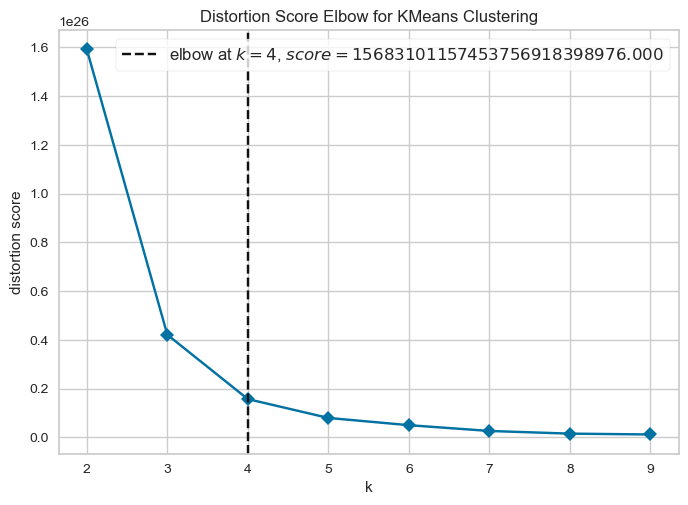

In [52]:
model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)
visualizer.fit(x)  
visualizer.show();

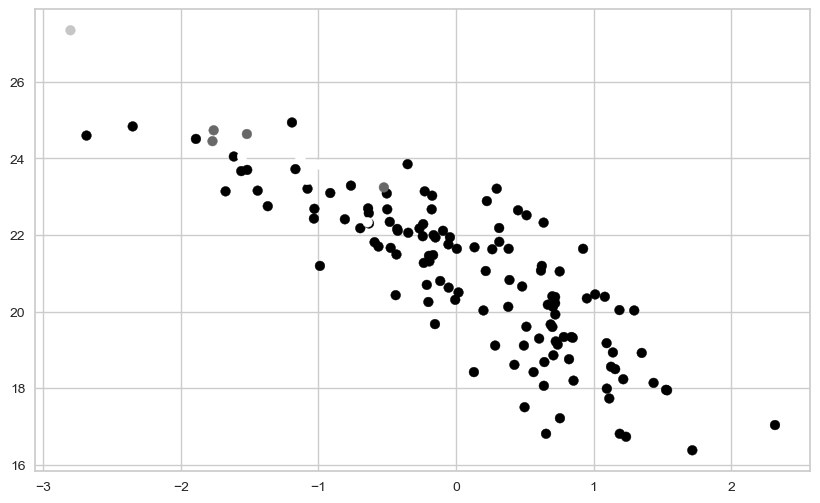

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(np.log(x['Military Strength Power Index']), np.log(x['defense spending budget value']), c=guess)

In [54]:
# Hierarchical Clustering

In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [56]:
data=linkage(x, method='ward', metric='euclidean')

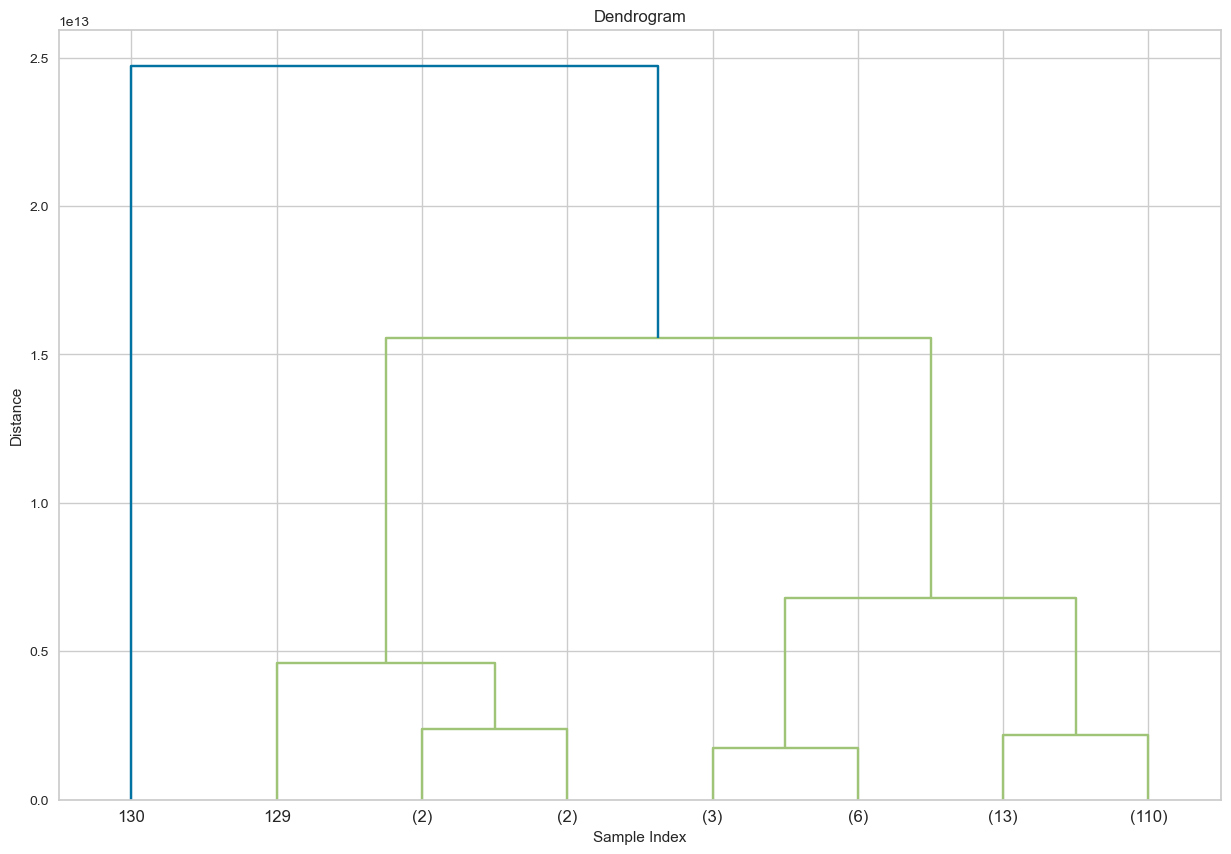

In [57]:
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))

# Dendrogram oluştur
dendrogram(data, truncate_mode='level', p=3)  # p: Kümeleme sayısı
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

In [58]:
x["Country"]=df["Country"]

In [59]:
x[x['Cluster']==0]

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Cluster,Country
6,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48.0,2.000000,6.0,2.000000,8.000000,26300000000,1714000000000,480,263000,1005000,1821000000,10808002,23470145,0,Australia
12,1.0499,148,43,0,12,64,29,0,0,984,0,0,0,17.0,0.000000,0.0,0.000000,2.000000,4921000000,1281000000000,41,0,645000,0,4833107,11570762,0,Belgium
22,0.3712,385,62,0,38,135,145,0,80,1973,0,133,0,64.0,0.000000,4.0,0.000000,12.000000,22500000000,1608000000000,1467,3977000,2500000,169700000000,16110865,35881659,0,Canada
26,0.0691,3210,1232,371,224,314,911,281,3500,33000,3800,3600,2650,777.0,2.000000,74.0,36.000000,52.000000,237000000000,1598000000000,507,3838000,13500000,25620000000,752855402,1384688986,0,China
53,1.9481,19,0,0,0,8,8,0,0,124,0,0,0,8.0,0.000000,0.0,0.000000,0.000000,870000000,2470000000000,40,0,145000,0,2366779,5068050,0,Ireland
55,0.2111,860,99,110,38,185,439,59,200,6947,54,108,21,249.0,2.000000,8.0,4.000000,12.000000,27800000000,2444000000000,129,77530,1300000,556700000,28011003,62246674,0,Italy
57,0.1501,1561,279,12,60,427,637,119,1004,3130,238,500,99,155.0,4.000000,20.0,40.000000,0.000000,49000000000,3240000000000,175,3841,4000000,44120000,53873803,126168156,0,Japan
112,0.3388,512,137,12,46,162,162,19,327,2023,95,140,0,77.0,1.000000,3.0,0.000000,11.000000,15100000000,2094000000000,150,2252,1226000,150000000,23136275,49331076,0,Spain
117,0.5259,169,54,0,18,54,42,0,326,1338,224,0,0,0.0,0.382609,4.8,2.052174,3.521739,5000000000,1664000000000,63,0,260000,0,3632250,8292809,0,Switzerland


In [60]:
x.groupby('Cluster')['Country'].unique()

Cluster
0    [Australia, Belgium, Canada, China, Ireland, I...
1                                      [United States]
2       [France, Germany, Netherlands, United Kingdom]
3    [Afghanistan, Albania, Algeria, Angola, Argent...
Name: Country, dtype: object

In [62]:
x[x['Country']=='Switzerland']

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Cluster,Country
117,0.5259,169,54,0,18,54,42,0,326,1338,224,0,0,0.0,0.382609,4.8,2.052174,3.521739,5000000000,1664000000000,63,0,260000,0,3632250,8292809,0,Switzerland
